In [52]:
# Basic init & import
%pylab inline
import networkx as nx
import numpy as np

# Usefull functions
def assignMutation(PPI,mutationProfile):
	for gene in range(0,len(PPI)):
		PPI.node[gene]['val']=mutationProfile[gene]
	return PPI

def extractMutationProfile(PPI):
    return [float(PPI.node[gene]['val']) for gene in PPI.nodes()]

Populating the interactive namespace from numpy and matplotlib


In [53]:
# Store dataset or load a previous one?
newDataset=True

import pickle
file = open('dataset.txt', 'r')
data = pickle.load(file)
PPI=data['PPI']
patients=data['patients']
phenotypes=data['phenotypes']
pathwaysNum=data['pathwaysNum']
genesNum=data['genesNum']
connProbability=data['connProbability']
connNeighboors=data['connNeighboors']
connBetweenPathways=data['connBetweenPathways']
patientsNum=data['patientsNum']
mutationProb=data['mutationProb']
file.close()

In [54]:
# Diffusion of the mutations according to PPI topology
diffusionFactor=0.8
PPIAdjacencyMatrix=nx.to_numpy_matrix(PPI)

def mutationProfileDiffusion(mutationProfile,PPIAdjacencyMatrix,diffusionFactor):
    D=np.diagflat(1./np.array(PPIAdjacencyMatrix.sum(axis=0)))
    X1=mutationProfile
    X2=alpha*X1*(PPIAdjacencyMatrix*D)+(1-diffusionFactor)*mutationProfile
    while norm(X2-X1)>10e-6:
        X1=X2
        X2=alpha*X1*(PPIAdjacencyMatrix*D)+(1-diffusionFactor)*mutationProfile
    return np.array(np.squeeze(X2))

In [55]:
patientsDiffused=[]
for patient in range(0,patientsNum):
    mutationProfile=mutationProfileDiffusion(np.array(extractMutationProfile(patients[patient])),PPIAdjacencyMatrix,diffusionFactor)[0]
    patientsDiffused.append(assignMutation(PPI,mutationProfile).copy())

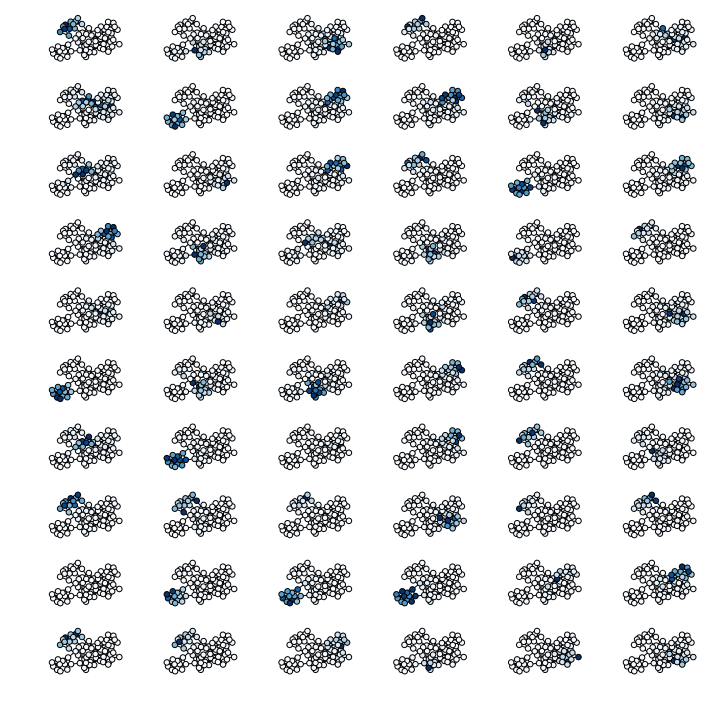

In [58]:
# Visualization of the patients networks after diffusion
import matplotlib.pyplot as plt
plt.figure(1,figsize=(12,12))
pos=nx.graphviz_layout(PPI,prog="neato")
for pn in range(0,patientsNum):
    node_color=extractMutationProfile(patientsDiffused[pn])
    plt.subplot(10, 6, pn+1)
    nx.draw(patientsDiffused[pn],pos,with_labels=False,node_size=30,node_color=node_color,cmap = plt.cm.Blues)
plt.show()

In [59]:
# Store diffused dataset?
newDataset=True

if newDataset:
    file = open('datasetDiffused.txt', 'w')
    data = {'PPI': PPI, 'patients' : patients, 'patientsDiffused' : patientsDiffused, 'phenotypes': phenotypes, 'pathwaysNum': pathwaysNum,'genesNum': genesNum,'connProbability': connProbability,'connNeighboors': connNeighboors,'connBetweenPathways': connBetweenPathways,'patientsNum': patientsNum,'mutationProb': mutationProb,'diffusionFactor': diffusionFactor}
    pathwaysNum,genesNum,connProbability,connNeighboors,connBetweenPathways,patientsNum,mutationProb
    pickle.dump(data, file)
file.close()